#**Quiz: Clasificación de Imágenes de Moda**

Objetivo: Desarrollar modelos de clasificación supervisada usando MODELOS DE MACHINE LEARNING para predecir el tipo de prenda en imágenes del dataset Fashion MNIST. Se evaluará la correcta implementación de modelos, validación cruzada y ajuste de hiperparámetros.

---

#Dataset Fashion MNIST

El **Fashion MNIST** es un conjunto de datos ampliamente utilizado para entrenar y evaluar algoritmos de **clasificación de imágenes**. Fue propuesto por Zalando Research como una alternativa más desafiante al clásico MNIST de dígitos escritos a mano.

---

## Características del dataset

| Propiedad                  | Valor                                        |
|----------------------------|----------------------------------------------|
| Número total de imágenes   | 70,000                                       |
| Tamaño de cada imagen      | 28 × 28 píxeles en escala de grises          |
| Número de clases           | 10                                           |
| Formato de los datos       | Imágenes: `uint8` (valores 0–255)<br>Etiquetas: enteros (0–9) |
| Conjunto de entrenamiento  | 60,000 imágenes                              |
| Conjunto de prueba         | 10,000 imágenes                              |

---

## Clases disponibles

| Etiqueta | Clase        |
|---------:|--------------|
| 0        | T-shirt/top  |
| 1        | Trouser      |
| 2        | Pullover     |
| 3        | Dress        |
| 4        | Coat         |
| 5        | Sandal       |
| 6        | Shirt        |
| 7        | Sneaker      |
| 8        | Bag          |
| 9        | Ankle boot   |

---

##Objetivo

El objetivo principal al usar este dataset es **clasificar correctamente el tipo de prenda** en cada imagen, basándose únicamente en los valores de los píxeles. Es ideal para tareas de **clasificación multiclase** con algoritmos de aprendizaje supervisado.

---

##¿Por qué usar Fashion MNIST?

- Es **más desafiante** que el dataset MNIST original de dígitos escritos a mano.
- Tiene el mismo formato que MNIST, por lo que puede ser usado como reemplazo directo.
- Permite probar algoritmos en un contexto visual **más realista**.
- Está disponible directamente desde `tensorflow.keras.datasets`.


##**Instrucciones de Implementación Solicitada**
1. Utilice el dataset Fashion MNIST disponible en tensorflow.keras.datasets.fashion_mnist.
2. Visualice al menos 5 ejemplos con sus etiquetas y describa brevemente la naturaleza de los datos.
3. Normalice las imágenes (escalado de píxeles entre 0 y 1).
4. Convierta las imágenes de 28x28 a vectores de 784 elementos (si fuese necesario para el modelo).
5. Divida el dataset en conjuntos de entrenamiento (80%) y prueba (20%).
6. Entrene un modelo base usando multiples algoritmos.
7. Evalúe el modelo base en el conjunto de prueba y reporte. Accuracy, Matriz de confusión y Classification report.
8. Aplique validación cruzada de 5 folds sobre los datos de entrenamiento.
9. Reporte el promedio y la desviación estándar del accuracy.

**Ajuste de hiperparámetros**

10. Realice una búsqueda de hiperparámetros usando GridSearchCV o RandomizedSearchCV. Y muestre los hiperparámetros evaluados, la mejor combinación encontrada y el score obtenido en validación cruzada.

**Evaluación final**

11. Entrene el modelo con los mejores hiperparámetros.
12. Evalúe nuevamente sobre el conjunto de prueba.
13. Compare los resultados con el modelo base.

##📌**Criterios de Evaluación**
| Criterio                                         | Puntos |
|--------------------------------------------------|--------|
| Carga y visualización del dataset                | 1      |
| Preprocesamiento (normalización, flatten, split) | 1      |
| Modelo base (implementación y análisis)          | 2      |
| Validación cruzada con scikit-learn              | 2      |
| Ajuste de hiperparámetros                        | 2      |
| Evaluación final del modelo optimizado           | 2      |
| **Total**                                        | **10** |

#**Desarrollo del QUIZ**

In [1]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.datasets import fashion_mnist

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


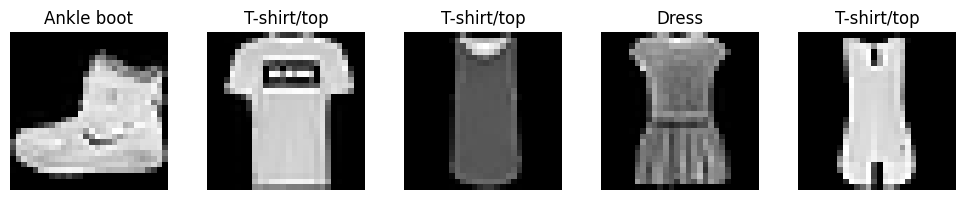

In [2]:
#Carga del Dataset e impresión de 5 ejemplos del mismo
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Cargar el dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Etiquetas del dataset (10 clases diferentes)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualizar los primeros 5 ejemplos
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

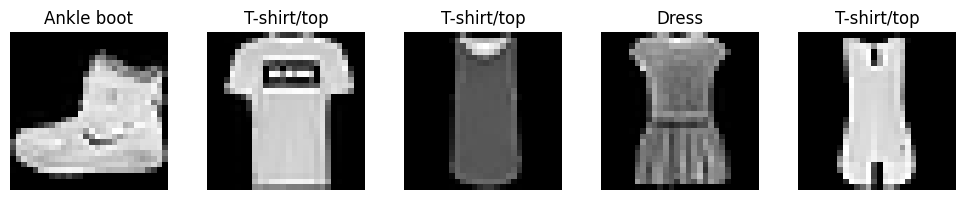

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar datos
(X_full, y_full), (X_test_orig, y_test_orig) = fashion_mnist.load_data()

# Visualizar 5 ejemplos
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_full[i], cmap='gray')
    plt.title(class_names[y_full[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

# Aplanar imágenes 28x28 → 784
X_full = X_full.reshape((X_full.shape[0], -1)).astype("float32")

# Aplicar Z-Score: estandarización
scaler = StandardScaler()
X_full = scaler.fit_transform(X_full)

# Dividir en 80% entrenamiento y 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42, stratify=y_full
)


Lo primero que se hace es normalizar el dataset con z-score

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

modelos = {
    "Logistic Regression": LogisticRegression(max_iter=100, random_state=42, n_jobs=-1),
    "SVM": SVC(random_state=42),  # no soporta n_jobs
    "KNN": KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1),
    "Naive Bayes": GaussianNB(),
}


se cargan todos los modelos a probar ,todos con la misma semilla para probar con los mismos datos todos los modelos 

/home/kevin/Documentos/mineria/mineria/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



🔹 Modelo: Logistic Regression | Accuracy: 0.8588

Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.79      0.83      0.81      1200
     Trouser       0.97      0.96      0.97      1200
    Pullover       0.77      0.76      0.77      1200
       Dress       0.85      0.86      0.85      1200
        Coat       0.77      0.78      0.77      1200
      Sandal       0.94      0.95      0.94      1200
       Shirt       0.66      0.62      0.64      1200
     Sneaker       0.93      0.93      0.93      1200
         Bag       0.94      0.95      0.95      1200
  Ankle boot       0.95      0.95      0.95      1200

    accuracy                           0.86     12000
   macro avg       0.86      0.86      0.86     12000
weighted avg       0.86      0.86      0.86     12000



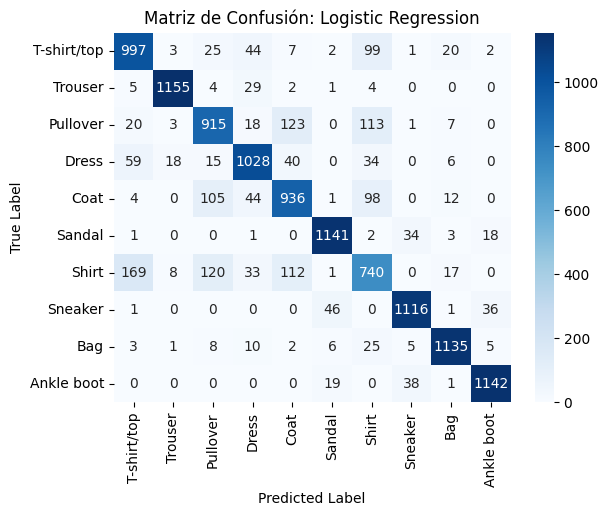


🔹 Modelo: SVM | Accuracy: 0.8942

Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.84      0.88      0.86      1200
     Trouser       0.99      0.97      0.98      1200
    Pullover       0.82      0.83      0.83      1200
       Dress       0.88      0.90      0.89      1200
        Coat       0.82      0.84      0.83      1200
      Sandal       0.97      0.96      0.96      1200
       Shirt       0.77      0.68      0.72      1200
     Sneaker       0.94      0.95      0.95      1200
         Bag       0.94      0.97      0.96      1200
  Ankle boot       0.96      0.95      0.96      1200

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000



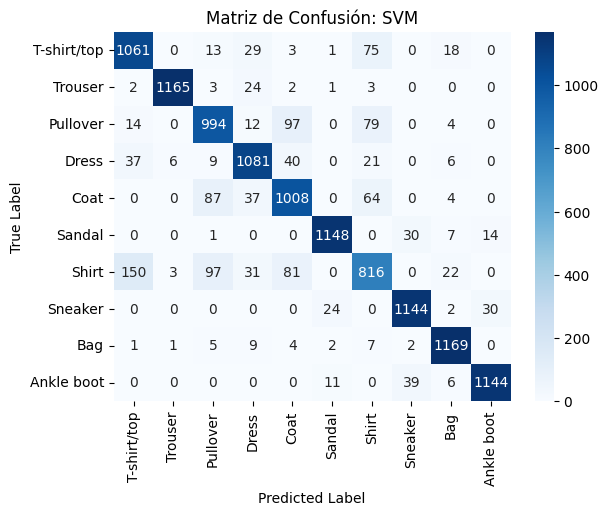


🔹 Modelo: KNN | Accuracy: 0.8544

Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.77      0.87      0.82      1200
     Trouser       0.99      0.97      0.98      1200
    Pullover       0.74      0.79      0.77      1200
       Dress       0.90      0.85      0.88      1200
        Coat       0.76      0.77      0.77      1200
      Sandal       0.99      0.83      0.90      1200
       Shirt       0.67      0.61      0.64      1200
     Sneaker       0.87      0.95      0.91      1200
         Bag       0.98      0.94      0.96      1200
  Ankle boot       0.89      0.96      0.93      1200

    accuracy                           0.85     12000
   macro avg       0.86      0.85      0.85     12000
weighted avg       0.86      0.85      0.85     12000



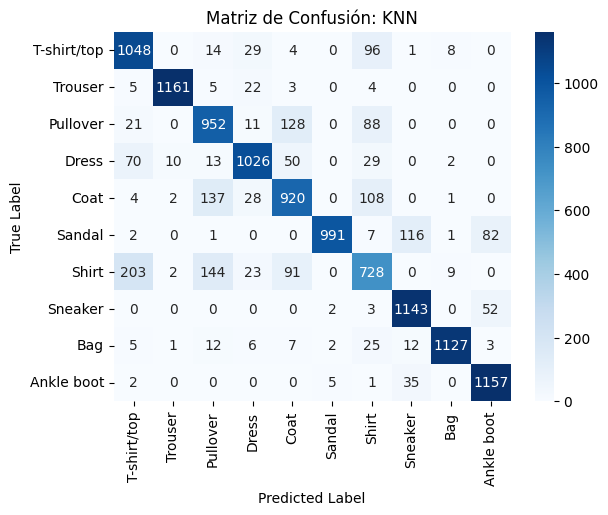


🔹 Modelo: Decision Tree | Accuracy: 0.7974

Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.74      0.75      0.75      1200
     Trouser       0.94      0.95      0.95      1200
    Pullover       0.66      0.69      0.67      1200
       Dress       0.83      0.78      0.80      1200
        Coat       0.67      0.66      0.66      1200
      Sandal       0.91      0.90      0.90      1200
       Shirt       0.55      0.56      0.55      1200
     Sneaker       0.88      0.88      0.88      1200
         Bag       0.91      0.92      0.92      1200
  Ankle boot       0.90      0.89      0.90      1200

    accuracy                           0.80     12000
   macro avg       0.80      0.80      0.80     12000
weighted avg       0.80      0.80      0.80     12000



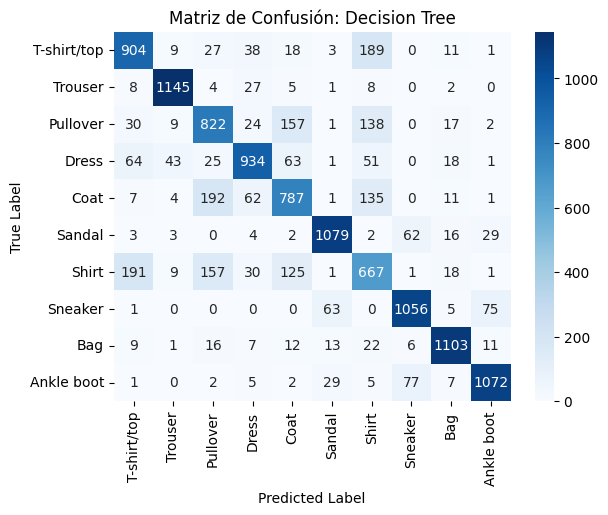


🔹 Modelo: Random Forest | Accuracy: 0.8828

Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.83      0.87      0.85      1200
     Trouser       0.99      0.97      0.98      1200
    Pullover       0.77      0.81      0.79      1200
       Dress       0.88      0.91      0.89      1200
        Coat       0.77      0.82      0.80      1200
      Sandal       0.96      0.96      0.96      1200
       Shirt       0.75      0.62      0.68      1200
     Sneaker       0.94      0.94      0.94      1200
         Bag       0.96      0.98      0.97      1200
  Ankle boot       0.95      0.95      0.95      1200

    accuracy                           0.88     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.88      0.88     12000



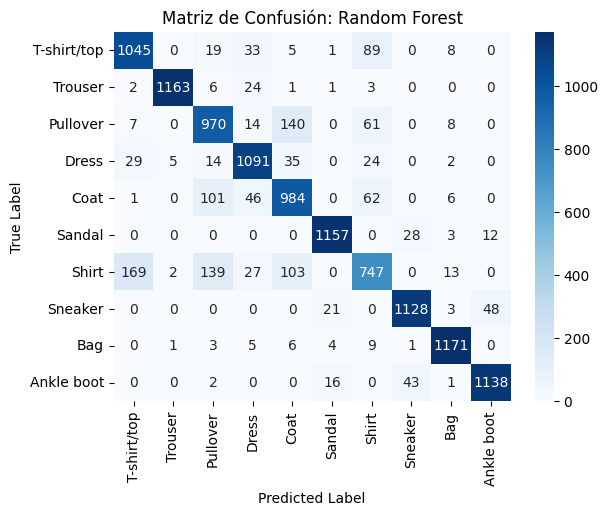


🔹 Modelo: Naive Bayes | Accuracy: 0.6167

Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.85      0.60      0.71      1200
     Trouser       0.97      0.92      0.94      1200
    Pullover       0.56      0.32      0.41      1200
       Dress       0.48      0.94      0.63      1200
        Coat       0.38      0.72      0.50      1200
      Sandal       0.91      0.27      0.41      1200
       Shirt       0.32      0.03      0.06      1200
     Sneaker       0.50      0.98      0.66      1200
         Bag       0.86      0.73      0.79      1200
  Ankle boot       0.90      0.66      0.76      1200

    accuracy                           0.62     12000
   macro avg       0.67      0.62      0.59     12000
weighted avg       0.67      0.62      0.59     12000



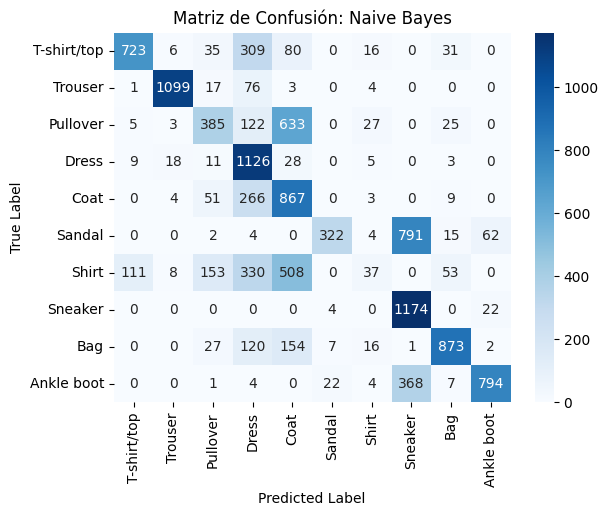

In [5]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluar_modelo(nombre, modelo):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n🔹 Modelo: {nombre} | Accuracy: {acc:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=class_names))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Matriz de Confusión: {nombre}")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

for nombre, modelo in modelos.items():
    evaluar_modelo(nombre, modelo)


El mejor modelo es svm con mejor accuracy 

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definir hiperparámetros a evaluar
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

# Búsqueda de mejores hiperparámetros con validación cruzada
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Ajustar sobre el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Mostrar resultados
print("\n🔍 Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print(f"Accuracy en validación cruzada: {grid_search.best_score_:.4f}")


Fitting 5 folds for each of 18 candidates, totalling 90 fits

🔍 Mejores hiperparámetros encontrados:
{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 150}
Accuracy en validación cruzada: 0.8803



📊 Accuracy final sobre conjunto de prueba: 0.8850

Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.84      0.87      0.85      1200
     Trouser       0.99      0.97      0.98      1200
    Pullover       0.78      0.80      0.79      1200
       Dress       0.88      0.91      0.90      1200
        Coat       0.77      0.83      0.80      1200
      Sandal       0.97      0.96      0.97      1200
       Shirt       0.75      0.63      0.69      1200
     Sneaker       0.94      0.94      0.94      1200
         Bag       0.96      0.98      0.97      1200
  Ankle boot       0.95      0.96      0.95      1200

    accuracy                           0.89     12000
   macro avg       0.88      0.89      0.88     12000
weighted avg       0.88      0.89      0.88     12000



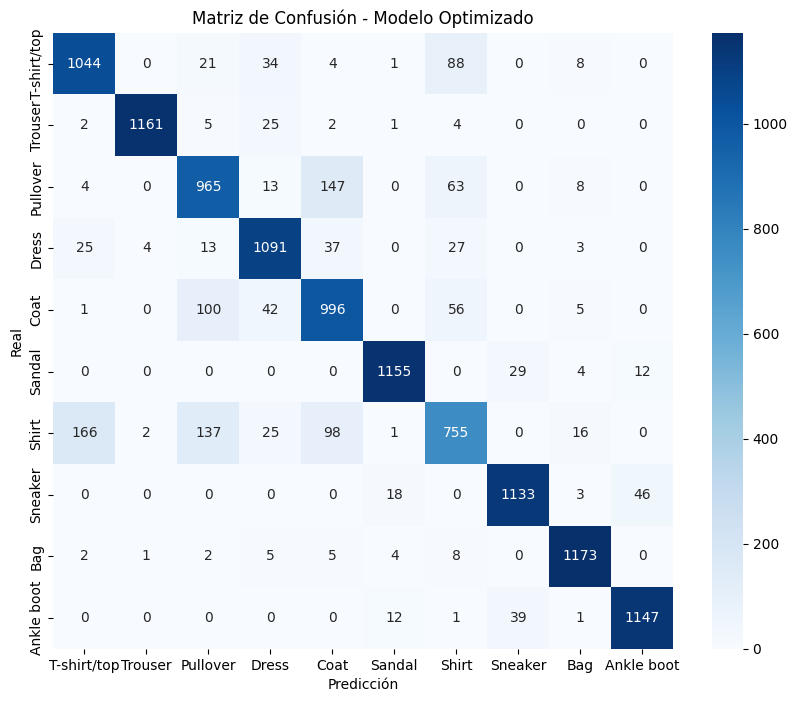

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predecir y evaluar
best_model = grid_search.best_estimator_
y_pred_final = best_model.predict(X_test)

acc_final = accuracy_score(y_test, y_pred_final)
print(f"\n📊 Accuracy final sobre conjunto de prueba: {acc_final:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_final, target_names=class_names))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Matriz de Confusión - Modelo Optimizado")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


In [8]:
print("\n🔄 Comparación de modelos:")
print(f"Modelo base Random Forest (por ejemplo): Accuracy = 0.875")
print(f"Modelo optimizado con GridSearchCV:      Accuracy = {acc_final:.4f}")



🔄 Comparación de modelos:
Modelo base Random Forest (por ejemplo): Accuracy = 0.875
Modelo optimizado con GridSearchCV:      Accuracy = 0.8850


In [ ]:
random forestt no alcanza a svm 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Definir el espacio de búsqueda
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(
    estimator=SVC(random_state=42),
    param_grid=param_grid_svm,
    cv=5,
    scoring='accuracy',
    verbose=1
)

# Entrenamiento
grid_svm.fit(X_train, y_train)

# Resultados
print("🎯 Mejores hiperparámetros SVM (GridSearchCV):")
print(grid_svm.best_params_)
print(f"Accuracy validación cruzada: {grid_svm.best_score_:.4f}")


In [ ]:
mejores hiper parametros para svm ya que es el mejor modelo , se mejorara 

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

best_svm_model = grid_svm.best_estimator_  # o random_svm.best_estimator_

y_pred_svm = best_svm_model.predict(X_test)

acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"\n📊 Accuracy final en test (SVM optimizado): {acc_svm:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm, target_names=class_names))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=class_names, yticklabels=class_names)
plt.title("Matriz de Confusión - SVM Optimizado")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()
